<a href="https://colab.research.google.com/github/jorgelum/meuPortfolio/blob/master/Esgoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto

Autor: *Jorge Luiz Mendes* 

##Introdução


Esse é um projeto de visualiazação de dados sobre a situação dos esgotos no Brasil. Os dados recolhidos são de 2013 com última atualização em 2018.

A fonte de dados foi obtida através Agência Nacional de Águas que podem ser acessados pelos links: 

- <https://dados.gov.br/>
- <https://www.gov.br/ana/pt-br>

##Bibliotecas

Leitura e Manipulação de Dados

In [ ]:
import pandas as pd
import numpy as np

Gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Mapas

In [ ]:
!pip install geobr #O geobr não é uma biblioteca nativa do Colab
import geobr

     |████████████████████████████████| 928 kB 43.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 46.0 MB/s 


## Os Dados

In [ ]:
'''O pandas permite abrir dados na estrutura de DataFrames'''
df = pd.read_csv('https://dadosabertos.ana.gov.br/datasets/1bf952cbf5314d57882272656438dc1f_1.csv?outSR=%7B%22latestWkid%22%3A4674%2C%22wkid%22%3A4674%7D')
df.head()


,FID,MUN_NM_MUN,MUN_CD_MUN,MUN_UF,MUN_POPU_2,MUN_NM_PRE,MUN_SIGLA_,MUN_ISCST,MUN_IFSUTI,MUN_ICS,MUN_ICT_FI,MUN_C_GERA,MUN_EFIC_1,MUN_C_REMA
0,0,Alta Floresta D Oeste,1100015,RO,14735,Serviço Autônomo de Água e Esgoto,SAAE,96.728704,1.846815,1.424481,0.0,795,1.108089,786
1,1,Ariquemes,1100023,RO,85770,Companhia de Águas e Esgotos de Rondônia,CAERD,89.406076,8.576282,2.017641,0.0,4631,5.145769,4393
2,2,Cabixi,1100031,RO,2771,Prefeitura Municipal de Cabixi,PM,98.997401,0.631266,0.371333,0.0,149,0.378760,149
3,3,Cacoal,1100049,RO,67665,Serviço Autônomo de Água e Esgoto de Cacoal,SAAE,28.821321,16.178679,0.000000,55.0,3653,50.957208,1791
4,4,Cerejeiras,1100056,RO,15276,Prefeitura Municipal de Cerejeiras,PM,79.637978,19.689299,0.672723,0.0,824,11.813579,727


In [ ]:
#Renomeando as Colunas 
df.rename(columns={'MUN_NM_MUN':'Município','MUN_CD_MUN':'Código(IBGE)','MUN_UF':'UF','MUN_POPU_2':'População',
            'MUN_NM_PRE':'Prestador de Serviço','MUN_SIGLA_':'Sigla','MUN_ISCST':'Parcela da População Sem Coleta e Sem Tratamento (%)',
            'MUN_IFSUTI':'Parcela da População Com Solução Individual (%)','MUN_ICS':'Parcela da População Com Coleta e Sem Tratamento (%)',
            'MUN_ICT_FI':'Parcela da População Com Coleta e Com Tratamento (%)',
            'MUN_C_GERA':'Carga Gerada Total (kgDBO/dia)','MUN_EFIC_1':'Remoção de Carga Orgânica (DBO) (%)',
            'MUN_C_REMA':'Carga Remanescente Total (kgDBO/dia)'},inplace = True)

In [ ]:
df.set_index('FID',inplace=True)
df.head()

,Município,Código(IBGE),UF,População,Prestador de Serviço,Sigla,Parcela da População Sem Coleta e Sem Tratamento (%),Parcela da População Com Solução Individual (%),Parcela da População Com Coleta e Sem Tratamento (%),Parcela da População Com Coleta e Com Tratamento (%),Carga Gerada Total (kgDBO/dia),Remoção de Carga Orgânica (DBO) (%),Carga Remanescente Total (kgDBO/dia)
FID,,,,,,,,,,,,,
0,Alta Floresta D Oeste,1100015,RO,14735,Serviço Autônomo de Água e Esgoto,SAAE,96.728704,1.846815,1.424481,0.0,795,1.108089,786
1,Ariquemes,1100023,RO,85770,Companhia de Águas e Esgotos de Rondônia,CAERD,89.406076,8.576282,2.017641,0.0,4631,5.145769,4393
2,Cabixi,1100031,RO,2771,Prefeitura Municipal de Cabixi,PM,98.997401,0.631266,0.371333,0.0,149,0.378760,149
3,Cacoal,1100049,RO,67665,Serviço Autônomo de Água e Esgoto de Cacoal,SAAE,28.821321,16.178679,0.000000,55.0,3653,50.957208,1791
4,Cerejeiras,1100056,RO,15276,Prefeitura Municipal de Cerejeiras,PM,79.637978,19.689299,0.672723,0.0,824,11.813579,727


In [ ]:
print(f'O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O DataFrame possui 5570 linhas e 13 colunas


In [ ]:
'''Obtendo as informações sobre as variáveis'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Município                                             5570 non-null   object 
 1   Código(IBGE)                                          5570 non-null   int64  
 2   UF                                                    5570 non-null   object 
 3   População                                             5570 non-null   int64  
 4   Prestador de Serviço                                  5570 non-null   object 
 5   Sigla                                                 5570 non-null   object 
 6   Parcela da População Sem Coleta e Sem Tratamento (%)  5570 non-null   float64
 7   Parcela da População Com Solução Individual (%)       5570 non-null   float64
 8   Parcela da População Com Coleta e Sem Tratamento (%)  5570

É interessante carregar a base de dados do geobr, através dessa base poderemos construir os mapas.

In [ ]:
cidadesBr = geobr.read_municipality(year=2018)
cidadesBr.head()

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,"MULTIPOLYGON (((-62.23224 -11.90804, -62.20670..."
1,1100023.0,Ariquemes,11.0,RO,"MULTIPOLYGON (((-63.57327 -9.78326, -63.57016 ..."
2,1100031.0,Cabixi,11.0,RO,"MULTIPOLYGON (((-60.71834 -13.39058, -60.70904..."
3,1100049.0,Cacoal,11.0,RO,"MULTIPOLYGON (((-61.27873 -11.50596, -61.28097..."
4,1100056.0,Cerejeiras,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."


## Estado de São Paulo

In [ ]:
EstSP = df[df['UF']=='SP']
EstSP.head()

,Município,Código(IBGE),UF,População,Prestador de Serviço,Sigla,Parcela da População Sem Coleta e Sem Tratamento (%),Parcela da População Com Solução Individual (%),Parcela da População Com Coleta e Sem Tratamento (%),Parcela da População Com Coleta e Com Tratamento (%),Carga Gerada Total (kgDBO/dia),Remoção de Carga Orgânica (DBO) (%),Carga Remanescente Total (kgDBO/dia)
FID,,,,,,,,,,,,,
3123,Adamantina,3500105,SP,32679,Companhia de Saneamento Básico do Estado de Sã...,SABESP,0.644877,0.172155,0.000000,99.182968,1764,73.498689,467
3124,Adolfo,3500204,SP,3312,Companhia de Saneamento Básico do Estado de Sã...,SABESP,1.159053,3.656250,0.000000,95.184697,178,73.582272,47
3125,Aguaí,3500303,SP,30841,Prefeitura Municipal de Aguaí,PM,0.603427,0.620668,98.775904,0.000000,1665,0.372401,1659
3126,Águas da Prata,3500402,SP,7532,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.096309,3.898981,4.437240,82.567470,406,64.264991,145
3127,Águas de Lindóia,3500501,SP,17266,Serviço Autônomo de Água e Esgoto de Águas de ...,SAAE,0.000000,4.000000,67.200000,28.800000,932,28.320000,668


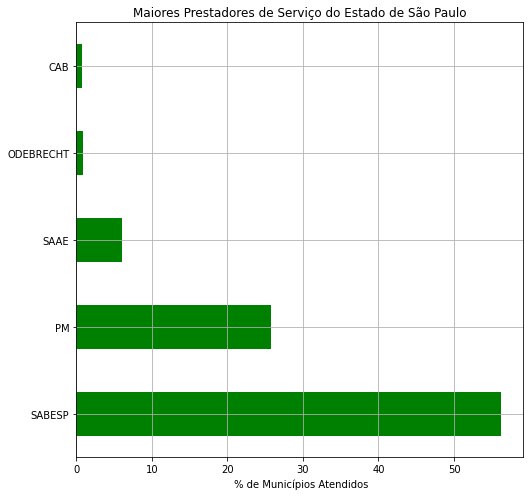

In [ ]:
plt.figure(figsize=(8,8))

plt.xlabel(' % de Municípios Atendidos')
plt.title('Maiores Prestadores de Serviço do Estado de São Paulo')
EstSP['Sigla'].value_counts(normalize=True).mul(100)[:5].plot(kind='barh',color = 'green',grid = True)

In [ ]:
spgeobr = cidadesBr[cidadesBr['abbrev_state']=='SP']
spgeobr.head()

,code_muni,name_muni,code_state,abbrev_state,geometry
3267,3500105.0,Adamantina,35.0,SP,"POLYGON ((-51.17835 -21.68855, -51.17924 -21.6..."
3268,3500204.0,Adolfo,35.0,SP,"POLYGON ((-49.69668 -21.34430, -49.69703 -21.3..."
3269,3500303.0,Aguaí,35.0,SP,"POLYGON ((-47.21948 -22.03920, -47.21232 -22.0..."
3270,3500402.0,Águas Da Prata,35.0,SP,"POLYGON ((-46.73076 -21.94354, -46.73192 -21.9..."
3271,3500501.0,Águas De Lindóia,35.0,SP,"POLYGON ((-46.64867 -22.49257, -46.65944 -22.4..."


In [ ]:
'''Podemos criar um DataFrame vazio e adicioanar os dados depois'''
'''Esse é um DataFrame Intermediário para auxiliar na manipulação dos dados'''
DfInter = pd.DataFrame()
DfInter['Mun'] = EstSP['Município']
DfInter['Carga Gerada Total (kgDBO/dia)'] = EstSP['Carga Gerada Total (kgDBO/dia)']
DfInter['Mun'] = DfInter['Mun'].str.lower()
DfInter.head()

,Mun,Carga Gerada Total (kgDBO/dia)
FID,,
3123,adamantina,1764
3124,adolfo,178
3125,aguaí,1665
3126,águas da prata,406
3127,águas de lindóia,932


In [ ]:
spgeobr['name_muni'] = spgeobr['name_muni'].str.lower()
spgeobr = spgeobr.merge(DfInter,how= "left",left_on = "name_muni",right_on = "Mun") 
spgeobr


,code_muni,name_muni,code_state,abbrev_state,geometry,Mun,Carga Gerada Total (kgDBO/dia)
0,3500105.0,adamantina,35.0,SP,"POLYGON ((-51.17835 -21.68855, -51.17924 -21.6...",adamantina,1764.0
1,3500204.0,adolfo,35.0,SP,"POLYGON ((-49.69668 -21.34430, -49.69703 -21.3...",adolfo,178.0
2,3500303.0,aguaí,35.0,SP,"POLYGON ((-47.21948 -22.03920, -47.21232 -22.0...",aguaí,1665.0
3,3500402.0,águas da prata,35.0,SP,"POLYGON ((-46.73076 -21.94354, -46.73192 -21.9...",águas da prata,406.0
4,3500501.0,águas de lindóia,35.0,SP,"POLYGON ((-46.64867 -22.49257, -46.65944 -22.4...",águas de lindóia,932.0
...,...,...,...,...,...,...,...
640,3557006.0,votorantim,35.0,SP,"POLYGON ((-47.46497 -23.53769, -47.46101 -23.5...",votorantim,5651.0
641,3557105.0,votuporanga,35.0,SP,"POLYGON ((-50.03205 -20.42645, -50.03870 -20.4...",votuporanga,4445.0
642,3557154.0,zacarias,35.0,SP,"POLYGON ((-49.98518 -21.05492, -49.98503 -21.0...",zacarias,108.0
643,3557204.0,chavantes,35.0,SP,"POLYGON ((-49.74234 -23.02696, -49.74896 -23.0...",chavantes,619.0


(-53.55728248009995,
 -43.71394052989996,
 -25.636916977149966,
 -19.50073859584995)

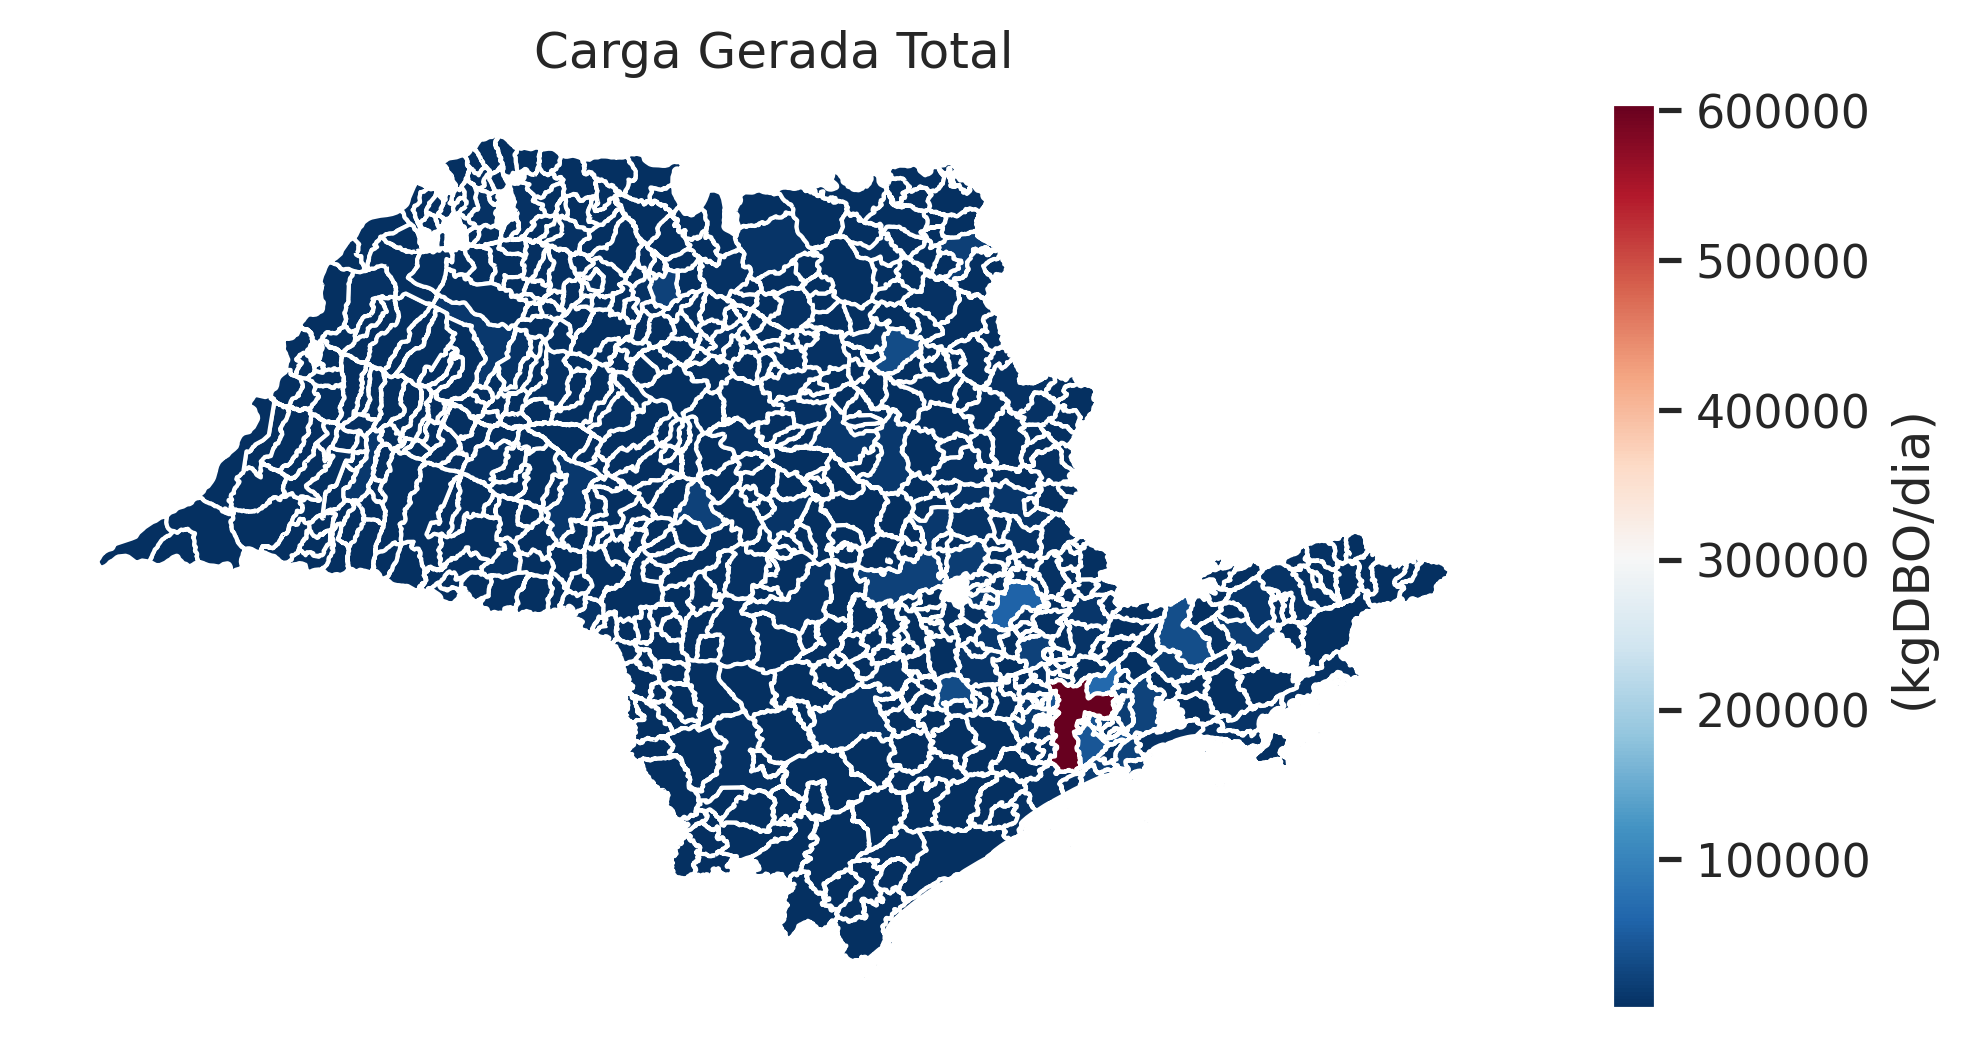

In [ ]:
plt.rcParams.update({"font.size": 6})

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

spgeobr.plot(
    column="Carga Gerada Total (kgDBO/dia)",
    cmap="RdBu_r",
    legend=True,
    legend_kwds={
        "label": "(kgDBO/dia)",
        "orientation": "vertical",
        "shrink": 0.5,
    },
    ax=ax,
)

ax.set_title("Carga Gerada Total")

ax.axis("off")

##Região do Grande ABC Paulista

In [ ]:
'''Para evitar confusões com municípios que possuem o mesmo nome foram utilizados os códigos do IBGE'''
lista = [3548708, 3547809, 3529401, 3513801, 3548807, 3543303, 3544103]

In [ ]:
ABC = df[df['Código(IBGE)'].isin(lista)]
ABC

,Município,Código(IBGE),UF,População,Prestador de Serviço,Sigla,Parcela da População Sem Coleta e Sem Tratamento (%),Parcela da População Com Solução Individual (%),Parcela da População Com Coleta e Sem Tratamento (%),Parcela da População Com Coleta e Com Tratamento (%),Carga Gerada Total (kgDBO/dia),Remoção de Carga Orgânica (DBO) (%),Carga Remanescente Total (kgDBO/dia)
FID,,,,,,,,,,,,,
3275,Diadema,3513801,SP,406718,Companhia de Saneamento Básico do Estado de Sã...,SABESP,2.620898,0.950299,84.606631,11.822171,21962,10.973690,19552
3453,Mauá,3529401,SP,417064,Odebrecht Ambiental Unid. Mauá,ODEBRECHT,3.066330,0.933670,0.000000,96.000000,22521,89.993068,2253
3609,Ribeirão Pires,3543303,SP,100807,Companhia de Saneamento Básico do Estado de Sã...,SABESP,15.175237,5.695688,23.738723,55.390353,5443,52.160923,2604
3617,Rio Grande da Serra,3544103,SP,37994,Companhia de Saneamento Básico do Estado de Sã...,SABESP,22.957012,16.855415,9.028136,51.159437,2051,55.133554,920
3657,Santo André,3547809,SP,707613,Serviço Municipal de Saneamento Ambiental de S...,SEMASA,1.911021,2.088979,55.680000,40.320000,38211,36.737221,24173
3667,São Bernardo do Campo,3548708,SP,801166,Companhia de Saneamento Básico do Estado de Sã...,SABESP,9.107972,3.083074,68.490985,19.317970,43263,18.868931,35099
3668,São Caetano do Sul,3548807,SP,149263,Departamento de Água e Esgoto de São Caetano d...,DAE,0.000000,0.000000,0.000000,100.000000,8060,88.000000,967


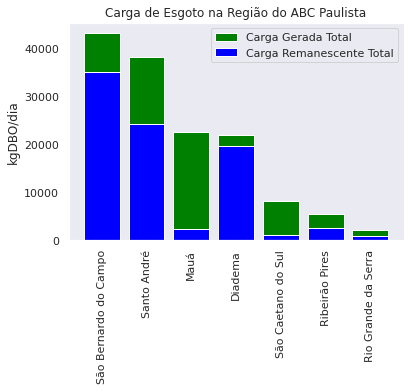

In [ ]:
sns.set_theme(style='dark')
OrdenaABC = ABC.sort_values('Carga Gerada Total (kgDBO/dia)',ascending=False)
fig = plt.subplot()

plt.title('Carga de Esgoto na Região do ABC Paulista')
plt.ylabel('kgDBO/dia')

plt.bar(OrdenaABC['Município'],OrdenaABC['Carga Gerada Total (kgDBO/dia)'],color='green',label='Carga Gerada Total')
plt.bar(OrdenaABC['Município'],OrdenaABC['Carga Remanescente Total (kgDBO/dia)'],color='Blue',label='Carga Remanescente Total')

plt.xticks(rotation = 90)
plt.legend()

Para poder plotar os mapas com o geobr é necessário obter as coordenadas geográficas na forma de Multipoligonos.

In [ ]:
'''Obtendo as cidades de interesse'''
RegABC = cidadesBr[cidadesBr['code_muni'].isin(lista)]
RegABC

,code_muni,name_muni,code_state,abbrev_state,geometry
3419,3513801.0,Diadema,35.0,SP,"POLYGON ((-46.62653 -23.66163, -46.62598 -23.6..."
3597,3529401.0,Mauá,35.0,SP,"POLYGON ((-46.48227 -23.64936, -46.48149 -23.6..."
3753,3543303.0,Ribeirão Pires,35.0,SP,"POLYGON ((-46.43643 -23.68825, -46.43527 -23.6..."
3761,3544103.0,Rio Grande Da Serra,35.0,SP,"POLYGON ((-46.41052 -23.73228, -46.40521 -23.7..."
3801,3547809.0,Santo André,35.0,SP,"POLYGON ((-46.49638 -23.62452, -46.49314 -23.6..."
3811,3548708.0,São Bernardo Do Campo,35.0,SP,"POLYGON ((-46.53690 -23.69440, -46.53686 -23.6..."
3812,3548807.0,São Caetano Do Sul,35.0,SP,"POLYGON ((-46.58239 -23.62200, -46.57900 -23.5..."


In [ ]:
'''Podemos criar um DataFrame vazio e adicioanar os dados depois'''
'''Esse é um DataFrame Intermediário para auxiliar na manipulação dos dados'''
DfInter = pd.DataFrame()
DfInter['Mun'] = ABC['Município']
DfInter['Parcela da População Com Coleta e Com Tratamento (%)'] = ABC['Parcela da População Com Coleta e Com Tratamento (%)']
DfInter['Mun'] = DfInter['Mun'].str.lower()
DfInter.head()

,Mun,Parcela da População Com Coleta e Com Tratamento (%)
FID,,
3275,diadema,11.822171
3453,mauá,96.000000
3609,ribeirão pires,55.390353
3617,rio grande da serra,51.159437
3657,santo andré,40.320000


In [ ]:
RegABC['name_muni'] = RegABC['name_muni'].str.lower()
RegABC = RegABC.merge(DfInter,how= "left",left_on = "name_muni",right_on = "Mun") 
RegABC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code_muni,name_muni,code_state,abbrev_state,geometry,Mun,Parcela da População Com Coleta e Com Tratamento (%)
0,3513801.0,diadema,35.0,SP,"POLYGON ((-46.62653 -23.66163, -46.62598 -23.6...",diadema,11.822171
1,3529401.0,mauá,35.0,SP,"POLYGON ((-46.48227 -23.64936, -46.48149 -23.6...",mauá,96.000000
2,3543303.0,ribeirão pires,35.0,SP,"POLYGON ((-46.43643 -23.68825, -46.43527 -23.6...",ribeirão pires,55.390353
3,3544103.0,rio grande da serra,35.0,SP,"POLYGON ((-46.41052 -23.73228, -46.40521 -23.7...",rio grande da serra,51.159437
4,3547809.0,santo andré,35.0,SP,"POLYGON ((-46.49638 -23.62452, -46.49314 -23.6...",santo andré,40.320000
5,3548708.0,são bernardo do campo,35.0,SP,"POLYGON ((-46.53690 -23.69440, -46.53686 -23.6...",são bernardo do campo,19.317970
6,3548807.0,são caetano do sul,35.0,SP,"POLYGON ((-46.58239 -23.62200, -46.57900 -23.5...",são caetano do sul,100.000000


(-46.67071319999999,
 -46.26003479999993,
 -23.986337698999957,
 -23.581104298999925)

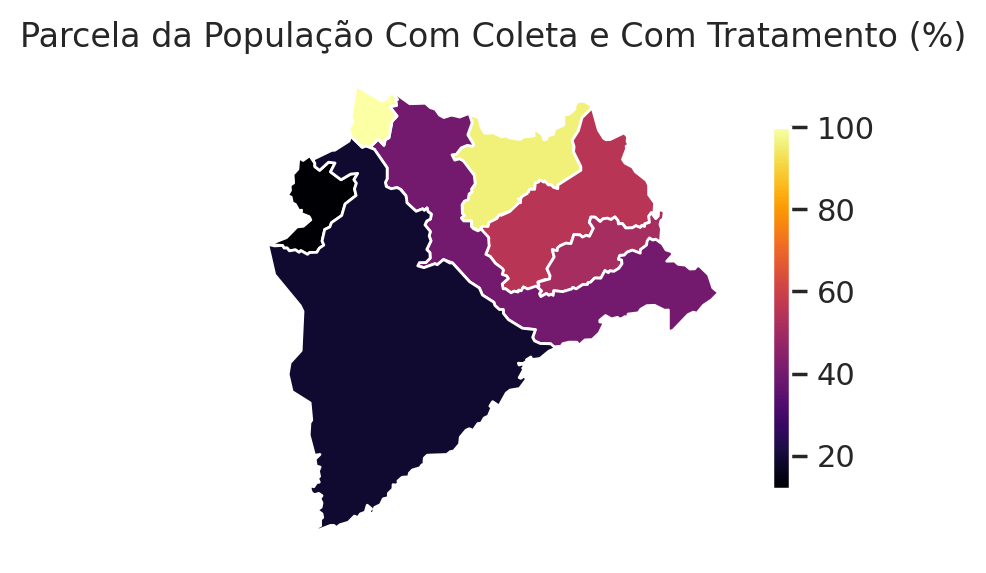

In [ ]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

RegABC.plot(
    column="Parcela da População Com Coleta e Com Tratamento (%)",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "",
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Parcela da População Com Coleta e Com Tratamento (%)")
ax.axis("off")